# Import Data

In [57]:
# Import libraries
import pandas as pd
import numpy as np
import os

# Import visualizations libraries 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

There are certain bugs associated with some versions of matplotlib. Before you start your analysis, you should check what version you have by typing matplotlib.__version__ in a Jupyter cell and executing it. If it shows version 3.1.1, you'll likely experience some problems with the way the heatmap appears.

In [58]:
matplotlib.__version__ # OK

'3.3.4'

In [59]:
# Assign path string to variable using raw string r'
path = r'D:\Docs\Career Foundry\II. Data Immersion\6. Advanced Analytics & Dashboard Design\Spotify Database - Alina Racu'

In [60]:
# Import csv file
df = pd.read_csv(os.path.join(path, "02 Data", "Prepared Data", "df_tracks_features.csv" ))

# Consistency Checks

In [61]:
# Check shape
df.shape

(538930, 23)

In [62]:
# Show all columns
pd.options.display.max_columns = None

In [63]:
# Check
df.head()

,Unnamed: 0,position,track_name,artist,streams,date,country,album,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year,release_date,_merge
0,0,12,Dile Que Tu Me Quieres,Ozuna,8982,2017-01-01,Ecuador,Odisea,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,2017,2017-08-25,both
1,1,12,Dile Que Tu Me Quieres,Ozuna,8048,2017-01-02,Ecuador,Odisea,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,2017,2017-08-25,both
2,2,12,Dile Que Tu Me Quieres,Ozuna,8425,2017-01-03,Ecuador,Odisea,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,2017,2017-08-25,both
3,3,12,Dile Que Tu Me Quieres,Ozuna,8808,2017-01-04,Ecuador,Odisea,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,2017,2017-08-25,both
4,4,11,Dile Que Tu Me Quieres,Ozuna,8307,2017-01-05,Ecuador,Odisea,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,2017,2017-08-25,both


In [64]:
# Remove columns
df = df.drop(columns = ["Unnamed: 0", "_merge"])

In [65]:
# Check
df.head(1)

,position,track_name,artist,streams,date,country,album,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year,release_date
0,12,Dile Que Tu Me Quieres,Ozuna,8982,2017-01-01,Ecuador,Odisea,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,2017,2017-08-25


# Exploring Relationships

## Correlations

In [66]:
# Create a correlation matrix using pandas
df.corr()

,position,streams,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year
position,1.000000,-0.141591,0.101902,-0.145538,-0.001090,-0.076225,0.034749,0.050873,-0.002626,0.060155,0.051823,-0.134346,0.036421,0.015949,-0.150122
streams,-0.141591,1.000000,0.028354,0.054215,-0.019938,0.010084,-0.017077,0.027423,0.008471,-0.014206,-0.001530,0.016887,0.004163,-0.012555,0.026693
explicit,0.101902,0.028354,1.000000,0.317334,-0.268026,-0.275297,-0.000837,0.414768,0.049770,-0.028144,0.046953,-0.147232,0.051137,-0.338575,0.053768
danceability,-0.145538,0.054215,0.317334,1.000000,0.018985,0.132398,-0.167284,0.087445,-0.279536,-0.037485,0.073684,0.367880,0.130773,-0.236976,0.176653
energy,-0.001090,-0.019938,-0.268026,0.018985,1.000000,0.691252,-0.153177,-0.067602,-0.448145,-0.012428,0.034185,0.235030,0.171192,0.131281,0.088055
loudness,-0.076225,0.010084,-0.275297,0.132398,0.691252,1.000000,-0.118107,-0.105720,-0.260379,-0.115225,-0.056895,0.322691,0.112618,0.259444,-0.053315
mode,0.034749,-0.017077,-0.000837,-0.167284,-0.153177,-0.118107,1.000000,-0.191350,0.176160,0.046053,0.045315,-0.206818,0.002893,0.141253,-0.123980
speechiness,0.050873,0.027423,0.414768,0.087445,-0.067602,-0.105720,-0.191350,1.000000,0.045582,-0.053615,0.021442,0.105802,0.064648,-0.177737,0.100690
acousticness,-0.002626,0.008471,0.049770,-0.279536,-0.448145,-0.260379,0.176160,0.045582,1.000000,0.037551,-0.044846,0.035279,-0.181710,-0.024850,-0.151315
instrumentalness,0.060155,-0.014206,-0.028144,-0.037485,-0.012428,-0.115225,0.046053,-0.053615,0.037551,1.000000,-0.016938,-0.059221,0.015937,0.073123,0.023184


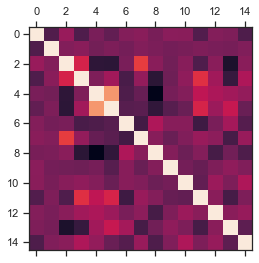

In [67]:
# Create a correlation heatmap using matplotlib
plt.matshow(df.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

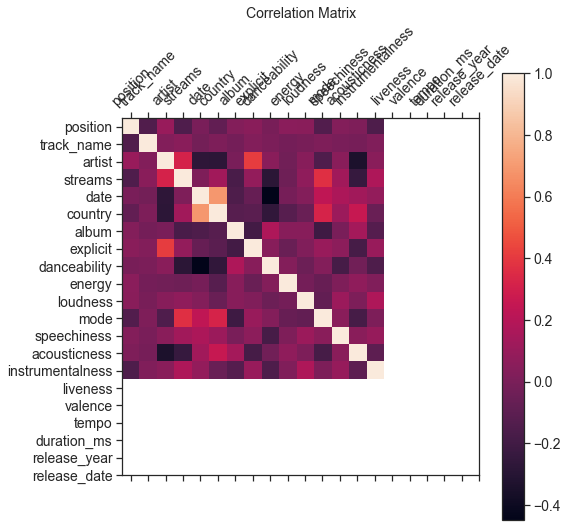

In [68]:
# Add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

### Correlation Heatmap Using seaborn

In [69]:
# Show columns
df.columns

Index(['position', 'track_name', 'artist', 'streams', 'date', 'country',
       'album', 'explicit', 'danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'release_year', 'release_date'],
      dtype='object')

In [70]:
# Create a subset excluding certain columns
sub = df[['position', 'artist', 'streams', 'country', 'explicit', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'duration_ms']]

In [71]:
# Check
sub

,position,artist,streams,country,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms
0,12,Ozuna,8982,Ecuador,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.858,88.006,226520
1,12,Ozuna,8048,Ecuador,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.858,88.006,226520
2,12,Ozuna,8425,Ecuador,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.858,88.006,226520
3,12,Ozuna,8808,Ecuador,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.858,88.006,226520
4,11,Ozuna,8307,Ecuador,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.858,88.006,226520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538925,187,Phil Lam,2251,Hong Kong,False,0.597,0.358,-9.077,1,0.0311,0.7020,0.000000,0.389,140.028,241283
538926,190,Phil Lam,2223,Hong Kong,False,0.598,0.357,-9.077,1,0.0308,0.7000,0.000000,0.395,140.027,241283
538927,190,Phil Lam,2223,Hong Kong,False,0.597,0.358,-9.077,1,0.0311,0.7020,0.000000,0.389,140.028,241283
538928,177,Phil Lam,2286,Hong Kong,False,0.598,0.357,-9.077,1,0.0308,0.7000,0.000000,0.395,140.027,241283


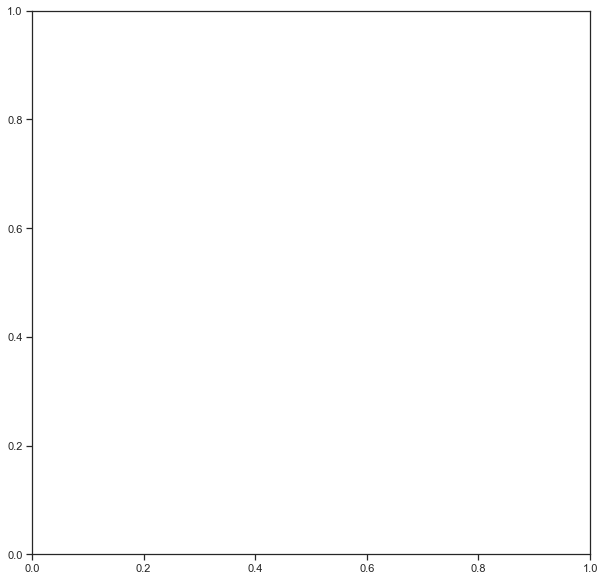

In [72]:
# Create a subplot with matplotlib. What it does is create an empty output, but this is okay—it's just to show the subplots.
f,ax = plt.subplots(figsize=(10,10))

In [73]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 
# The 'annot' argument allows the plot to place the correlation coefficients onto the heatmap.

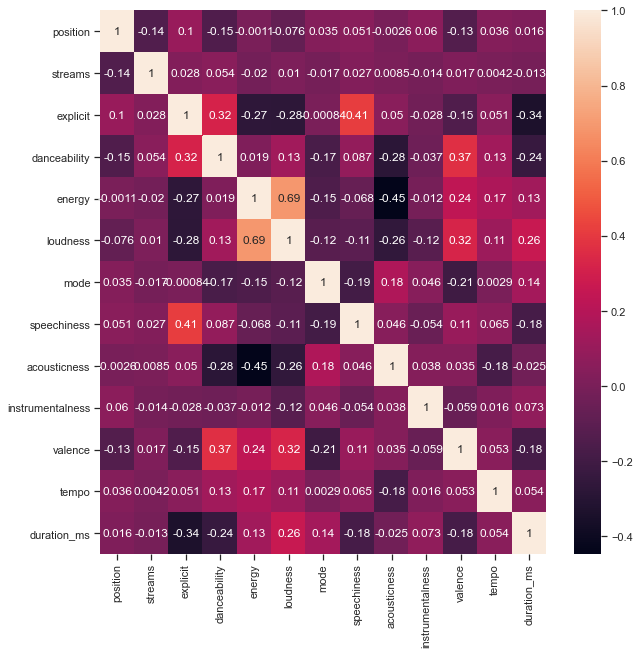

In [74]:
# Show figure
corr.figure

There is no relevant correlation between any of a song's features and its position in the ranking or number of streams. In other words, there is no "recipe" based on objective measurements that can predict a song's popularity. This just highlights  how subjective and varying music tastes are.

The highest degree of correlation identified is between energy and loudness variables. However, this is due to a logical circularity as the definition of energy includes loudness as one of the factors, apart from noisiness and rhythm speed. Another example of correlation between variables is the negative relationship between acousticness and energy, i.e. the more acoustic the song is, the less energetic it is, ovbiously.


The rest of the relationships are moderate at most. I found several relationships interesting:

* Speechiness and explicit (existence of profanity or curse words in the song): the more text the song contain the higher the likelihood it will contain curse words as well.

* Danceability and valence (music positiveness): the more danceable the song is, the more positive it sounds.

* Danceability and explicit: the more profanity a contains, the more danceable it is. I assume this is valid for rap and hip hop songs.

* Loudness and valence: the louder the song, the more positive it is. 

* Duration and explicit: songs containing profanity tend to be shorter in duration and the other way around.



Weak relationships:

* Danceability and acousticness: the more acoustic the song is, the less danceable, which is quite obvious.

* Loudness and explicit: songs containing profanity tend to be less loud.

* Duration and danceability: danceable songs tend to be shorter.



In [75]:
# Notes

# +0.69 energy - loudness --> correlation between the two variables
## +0.41 speechiness - explicit
## +0.37 valence - danceability
## +0.32 explicit - danceability
## +0.32 loudness - valence

# -0.45 energy - acousticness --> correlation between the two variables
## -0.34 duration_ms - explicit
## -0.28 danceability - acousticness
## -0.28 loudness - explicit 
# -0.26 loudness - acousticness --> correlation between the two variables
# -0.27 energy - explicit
## -0.24 duration_ms - danceability


## Scatterplots

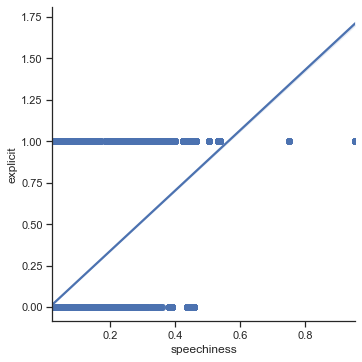

In [76]:
# Create a scatterplot
sns.lmplot(x = "speechiness", y = "explicit", data = df)

My initial assumption based on the relashionship strength was that songs containing more speech tend to contain also profanities. However, this plot shows that it is not always the case and that the relationship between the two is impacted by a few outlier songs containing a lot of speech which also happen to contain curse words.

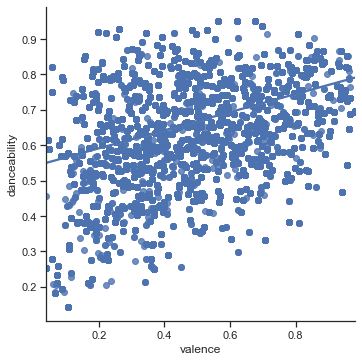

In [77]:
# Create a scatterplot
sns.lmplot(x = "valence", y = "danceability", data = df)

Moderate relationship, data very scattered. There are some outliers with a high valence (music positiveness), but are moderately danceable.

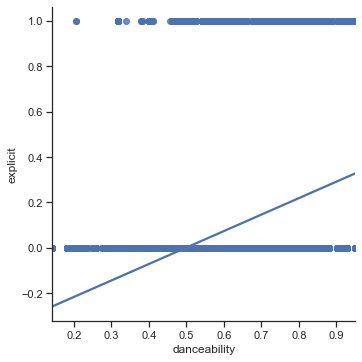

In [78]:
# Create a scatterplot
sns.lmplot(x = "danceability", y = "explicit", data = df)

Songs containing profanity tend to be more danceable, althought there are a few outliers not fitting this pattern.

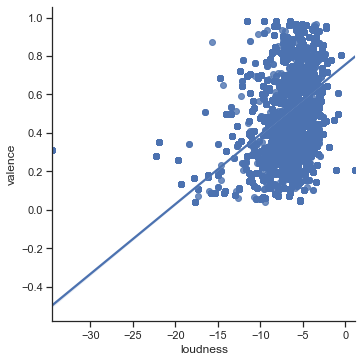

In [79]:
# Create a scatterplot
sns.lmplot(x = "loudness", y = "valence", data = df)

Moderate relationship. There is an outlier song that is very quiet and yet has music positiveness. Another outlier is a song that is extremely loud but not very cheerful.

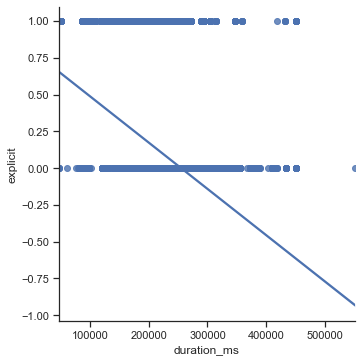

In [80]:
# Create a scatterplot
sns.lmplot(x = "duration_ms", y = "explicit", data = df)

Songs containing profanities tend to be shorter in duration than songs that do not contain them. However, there are exceptions highlighted by several outliers.

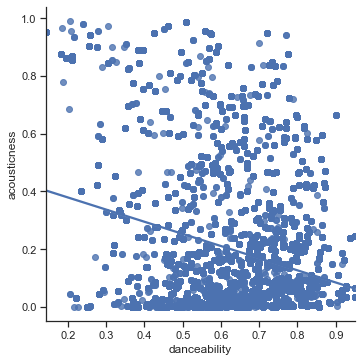

In [81]:
# Create a scatterplot
sns.lmplot(x = "danceability", y = "acousticness", data = df)

There is a negative weak relationship between danceability and acousticness. 
On the bottom of the graph one can notice some density in the data showing that danceable songs are very low on acousticness. However, the rest of the data on the graph is very scattered which weakens the relationship between the two variables.

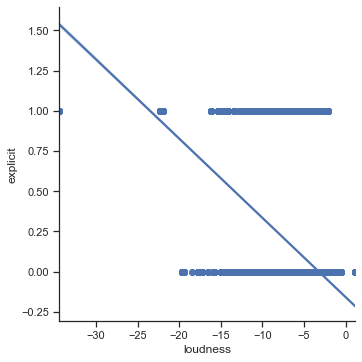

In [82]:
# Create a scatterplot
sns.lmplot(x = "loudness", y = "explicit", data = df)

My initial assumption was that songs containing profanities tend to be less loud. However, this is not accurate: the majority of such songs are louder than songs without profanities and the negative relationship is impacted by 3 outliers that score low on loudness.

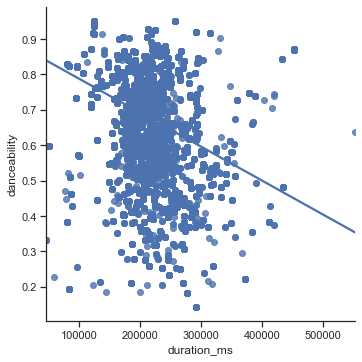

In [83]:
# Create a scatterplot
sns.lmplot(x = "duration_ms", y = "danceability", data = df)

There is a weak relationship between the duration of a song and danceability. The data is scattered on the graph and there are a number of outliers as well.

## Pair Plots

In [84]:
# Keep only the variables you want to use in the pair plot
sub_2 = sub[['danceability', 'valence', 'explicit', 'loudness', 'duration_ms']]

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


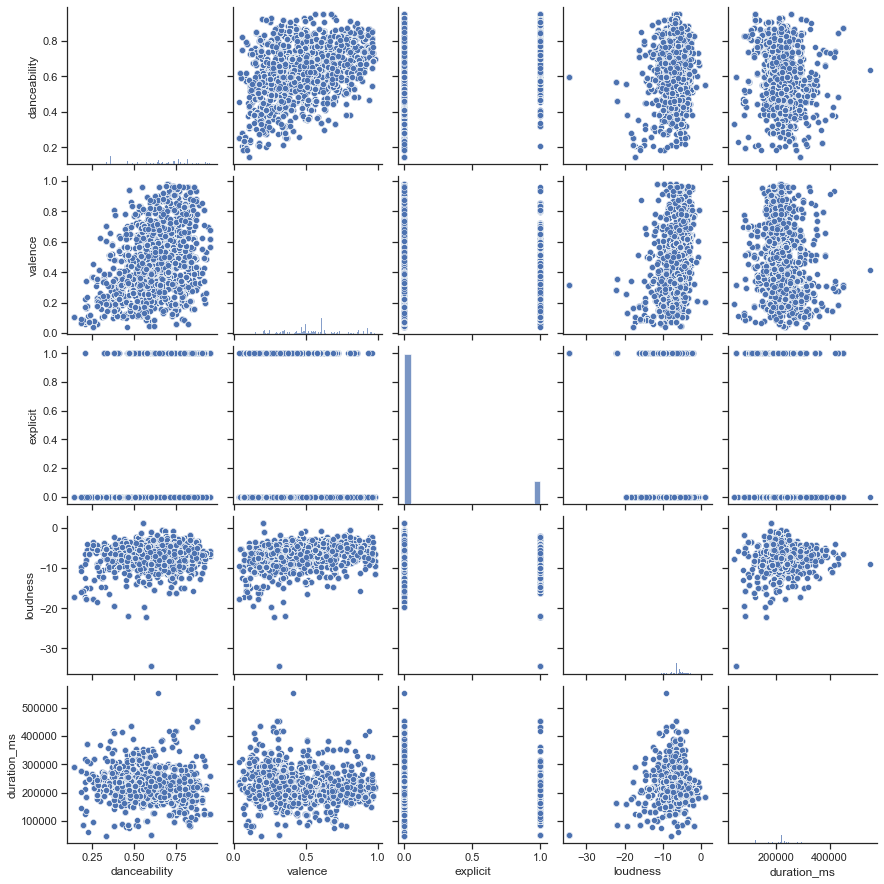

In [85]:
# Create a pair plot 
g = sns.pairplot(sub_2)

Pair plots are great visualization tools in that they bring together multiple scatterplots in one graph for a faster comparison.
One can notice that the most relevant relationship is that between danceability and valence.

## Categorical Plots

C:\Users\Alina\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valence', ylabel='Density'>

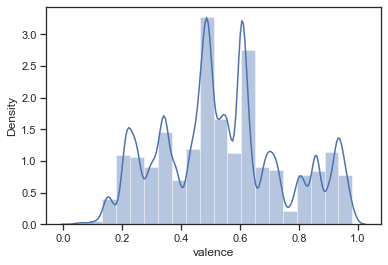

In [86]:
# Use a histogram to visualize the distribution of the variables. This way, you can determine sensible categories for the ranges. You don't want to end up with too few observations in any one of the categories.
sns.distplot(df['valence'], bins = 20)

In [87]:
# Create categories using loc()
df.loc[(df['valence'] < 0.3, 'positiveness')] = 'sad'
df.loc[(df['valence'] >= 0.3) & (df['valence'] < 0.6), 'positiveness'] = 'neutral'
df.loc[(df['valence'] >= 0.6, 'positiveness')] = 'happy'

In [88]:
# Table of counts
df['positiveness'].value_counts(dropna = False)

neutral    242746
happy      216349
sad         79835
Name: positiveness, dtype: int64

In [ ]:
# Create a categorical plot in seaborn using the price categories created above
sns.set(style="ticks")
g = sns.catplot(x="valence", y="danceability", hue="positiveness", data=df)

This chart highlights to a more granular level the relationship between danceability and music valence.
Happier, more cheerful songs are more danceable than sad songs. Perhaps an intuitive, obvious observation, but one that has been proven using scientific tools.

## Forming Hypotheses

* If a song scores high on positiveness and sounds happier, then it is more danceable.
* If a song scores low on acoustic, then it is less danceable.
* If a song is loud, then it score high on positiveness.
* If a song contains a lot of speech, then it will contain profanities as well.
* If a song is explicit, then it will also be louder.

# Export Data

In [91]:
# Export chart as image file
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap.png'))

In [92]:
# Export chart as image file
g.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pair_plot.png'))